# Import of libraries


In [1]:
# pandas
import pandas as pd

# numpy
import numpy as np

# sklearn
import sklearn

# math
import math

#seaborn
import seaborn as sns

# sklearn (pre)processing & pipeline
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#sklearn metrics & curves
from sklearn.metrics import  recall_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report
from sklearn.calibration import calibration_curve

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#sklearn Classifier models
from sklearn.linear_model import LogisticRegression     #LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier      #Nearest Neighbor
#from sklearn.svm import SVC                             #Support Vector Machine
#from sklearn.tree import DecisionTreeClassifier         #Decision Tree
#from sklearn.ensemble import RandomForestClassifier     #Random Forest
#from sklearn.naive_bayes import GaussianNB              #Naive Bayes
#from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting

#mathplot
import matplotlib.pyplot as plt


# Prepare Data

## Description of the data

Variables Table

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
|---------------|------|------|-------------|-------------|-------|----------------|
| age           | Feature | Integer | Age | | | no |
| job | Feature | Categorical | Occupation | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | | no |
| marital | Feature | Categorical | Marital Status | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | | no |
| education | Feature | Categorical | Education Level | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | | no |
| default | Feature | Binary | | has credit in default? | | no |
| housing | Feature | Binary | | has housing loan? | | no |
| loan | Feature | Binary | | has personal loan? | | no |
| contact | Feature | Categorical | | contact communication type (categorical: 'cellular','telephone') | | yes |
| day_of_week | Feature | Date | | last contact day of the week | | no |
| month | Feature	 | Date | | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | | no |
| duration | Feature | Integer | | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | | no |
| campaign | Feature | Integer | | number of contacts performed during this campaign and for this client (numeric, includes last contact) | | no |
| pdays | Feature | Integer | | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) | | yes |
| previous | Feature | Integer | | number of contacts performed before this campaign and for this client | | no |
| poutcome | Feature | Categorical | | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | | yes |
| emp.var.rate | Feature | float64 | | Employment variation rate, with a quarterly frequency | | no |
| cons.price.idx | Feature | float64 | | Monthly average consumer price index | | no |
| cons.conf.idx | Feature | float64 | | Monthly average consumer confidence index | | no |
| euribor3m | Feature | float64 | | Daily three month Euribor rate | | no |
| nr.employed | Feature | float64 | | Quarterly average of the total number of employed citizens | | no |
| y	| Target | Binary | | has the client subscribed a term deposit? | | |

## Import of Data

In [3]:
# Inladen met de juiste scheidingstekens
# bank_data_small = pd.read_csv('../../Data/bank-additional/bank-additional.csv', sep=';')
bank_data_full = pd.read_csv('Data/bank-additional/bank-additional-full.csv', sep=';')

In [4]:
# Based on the Variables Table (see above) the column 'duration' will not be used for predictive purposes
bank_data_full = bank_data_full.drop("duration", axis='columns')

In [5]:
bank_data_full.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank_data_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
bank_data_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
print("Continuous Variables: ")
continous_vars=bank_data_full.describe().columns  #get the names of numerical variables, in this case continuous variables
print(continous_vars)

print("\nCategorical Variables: ")
categorical_vars=bank_data_full.describe(include=[object]).columns
print(categorical_vars)

Continuous Variables: 
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Categorical Variables: 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


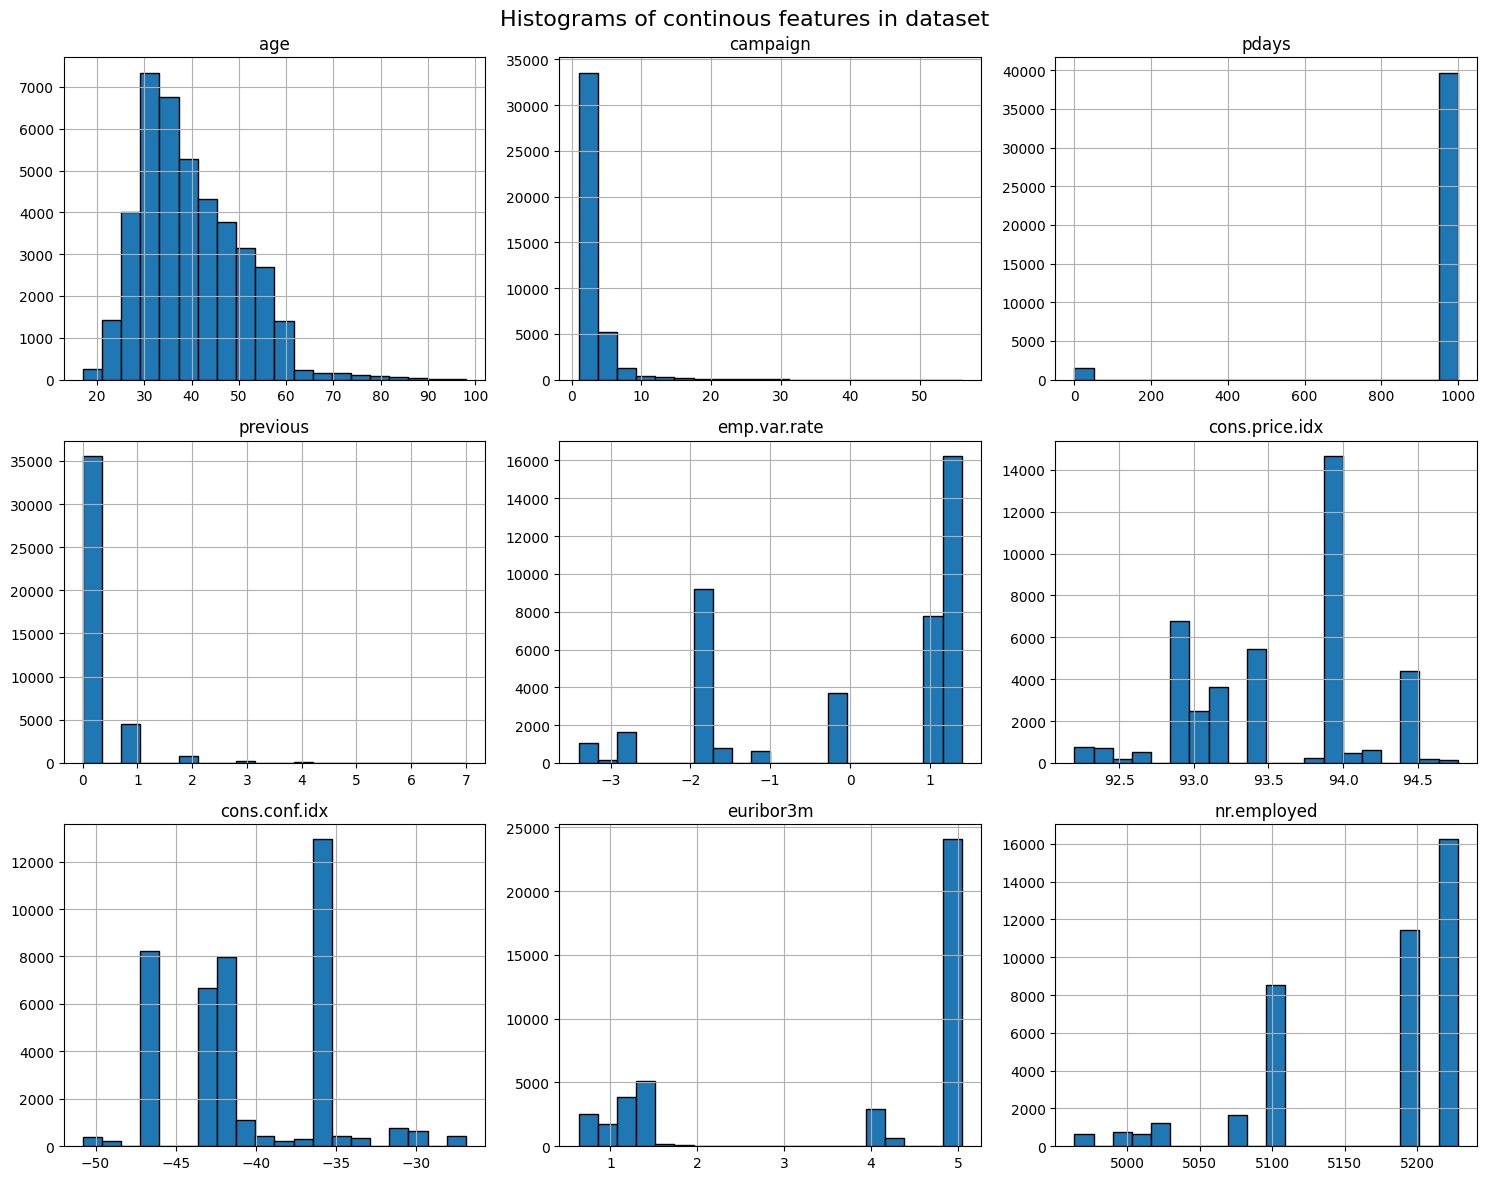

In [10]:
bank_data_full.hist(column=continous_vars, bins=20, figsize=(15, 12), edgecolor="black")
plt.suptitle("Histograms of continous features in dataset", fontsize=16)
plt.tight_layout()
plt.show()

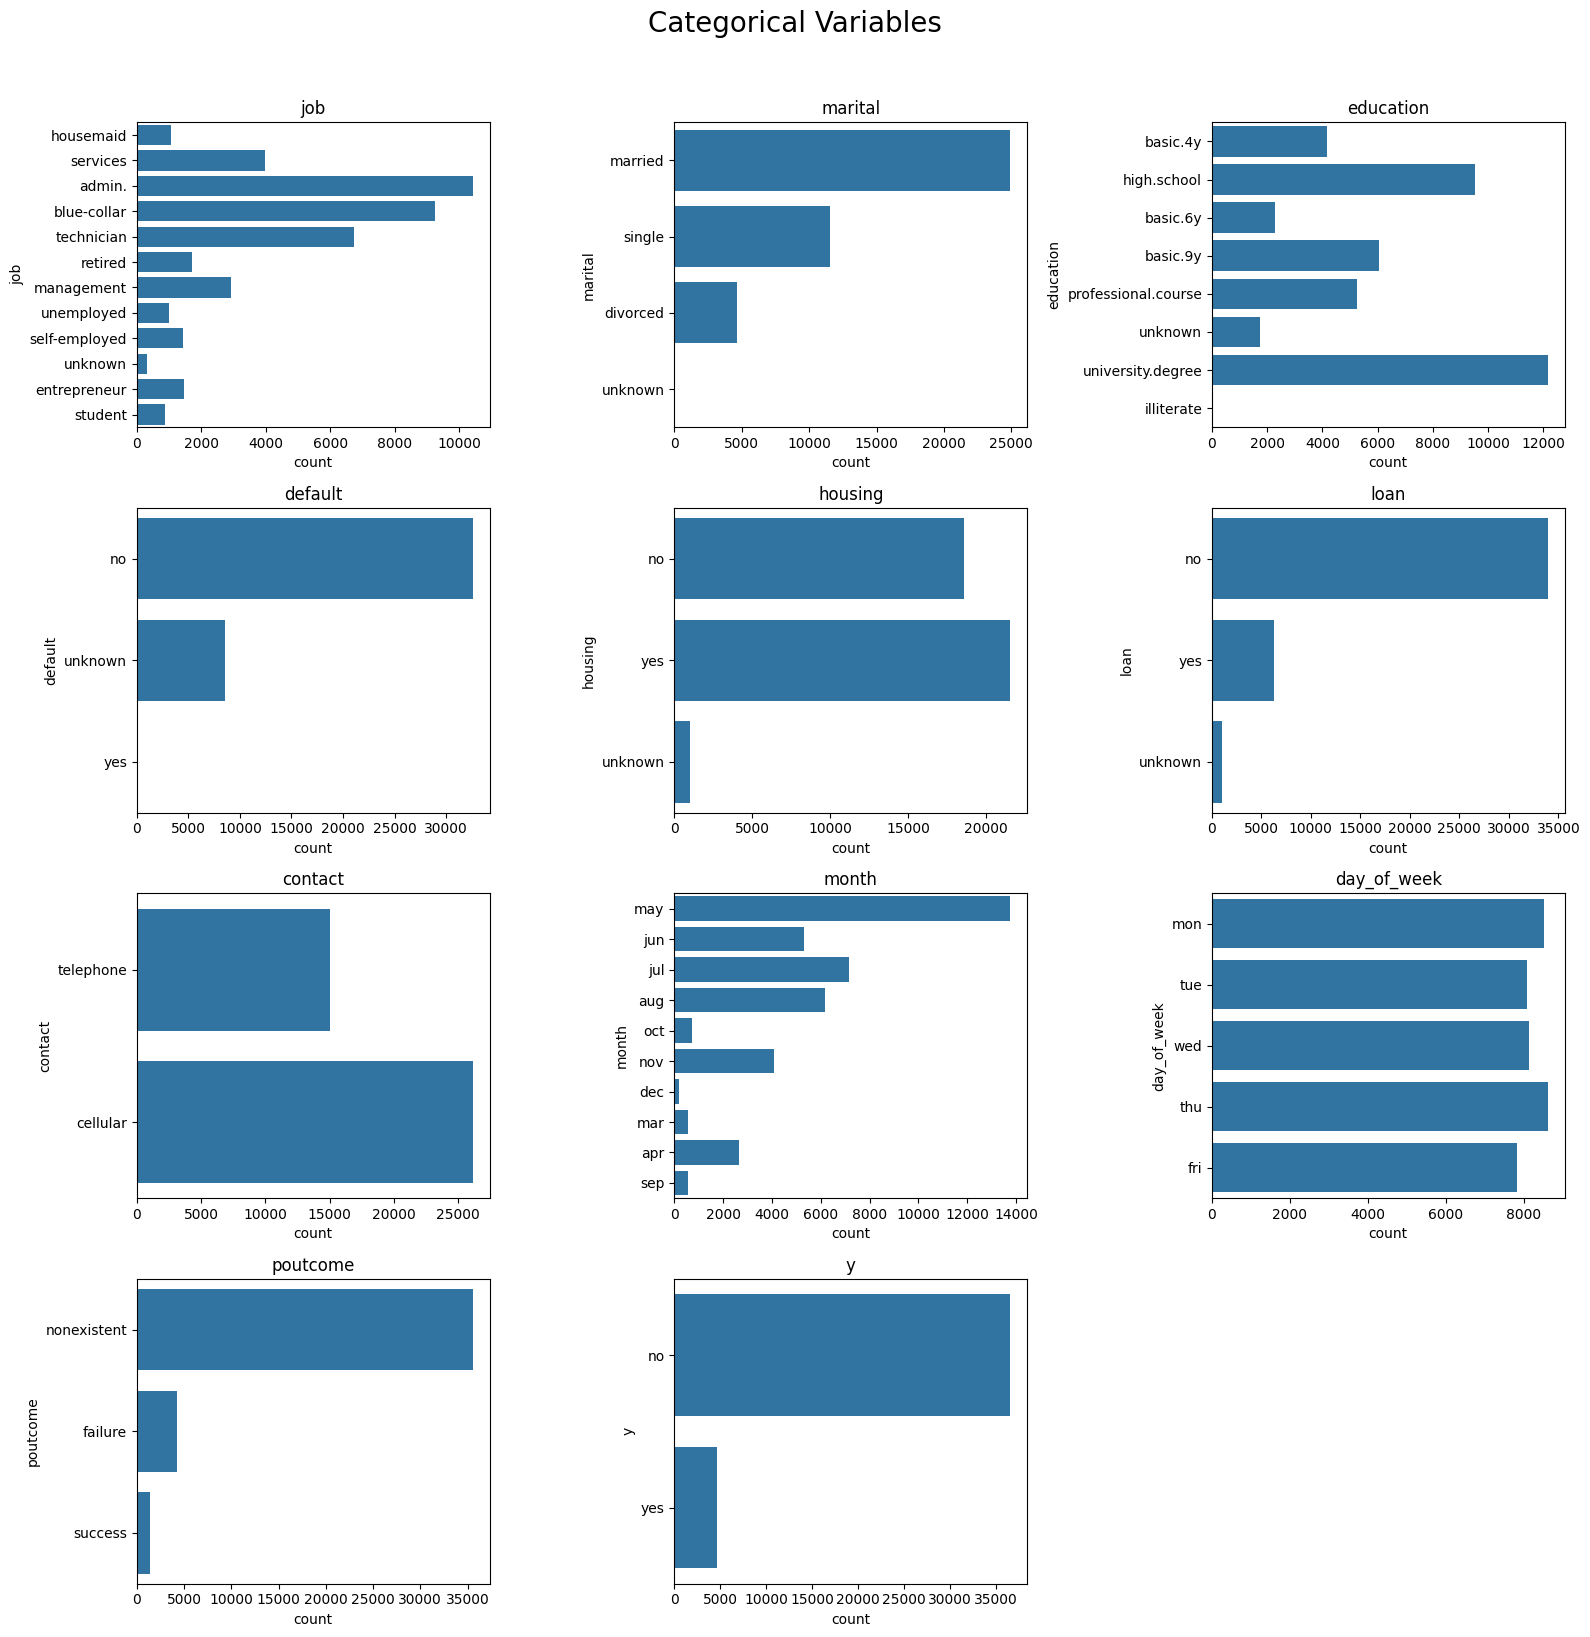

In [11]:
n = len(categorical_vars) # number of categorical variables

cols = 3
rows = math.ceil(n / cols) # automatically determine rows and columns

plt.figure(figsize=(16, rows * 4))

plt.suptitle("Categorical Variables", fontsize=20, y=1.02)

for i, col in enumerate(categorical_vars, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=bank_data_full, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

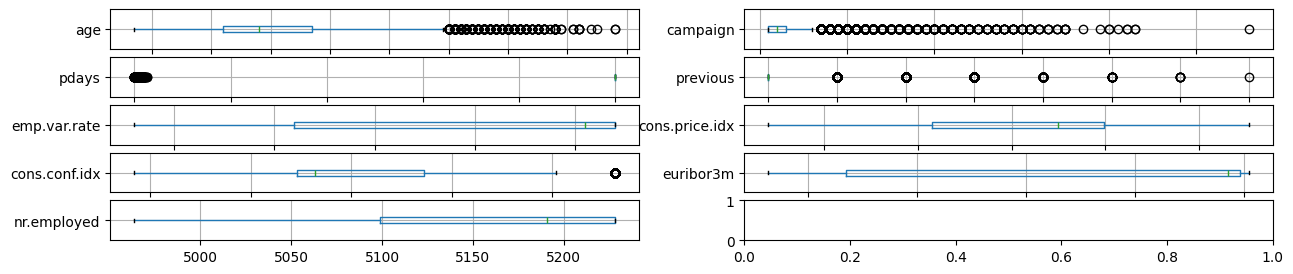

In [12]:
# number of boxes to plot is number of columns in df that are not an object.
columns_in_df = bank_data_full.select_dtypes(exclude='object').shape[1]

#number in columns in plot is 2 and number of rows is number of columns in df/number of columns in plot, rounded upwards
ncols = 2
nrows = math.ceil(columns_in_df/ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3) )

axsrow=0
axscol=0

for label, values in bank_data_full.items():
    if values.dtype != object:
        if axscol == 2:
            axsrow = axsrow + 1
            axscol = 0
        bank_data_full.boxplot(column=[label], vert=False, ax=axs[axsrow,axscol])
        axscol = axscol + 1

plt.xticks()
plt.show()    


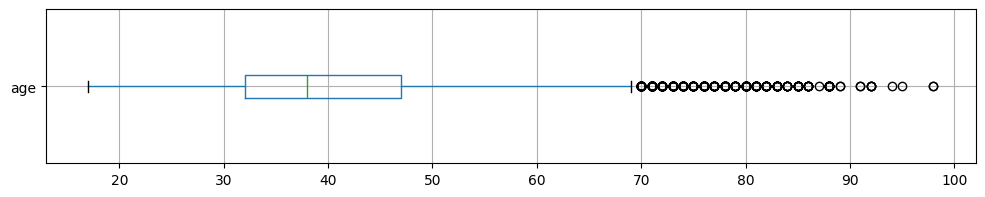

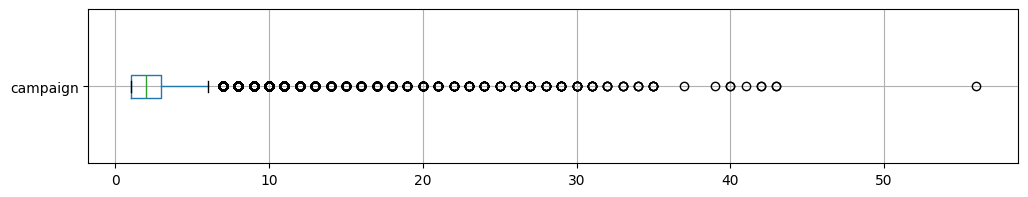

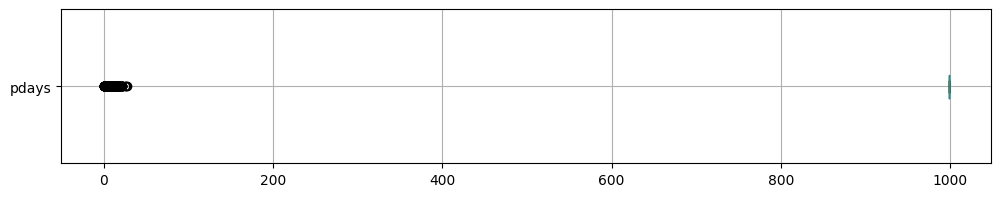

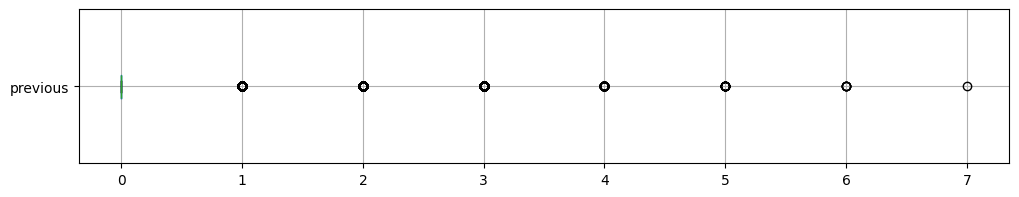

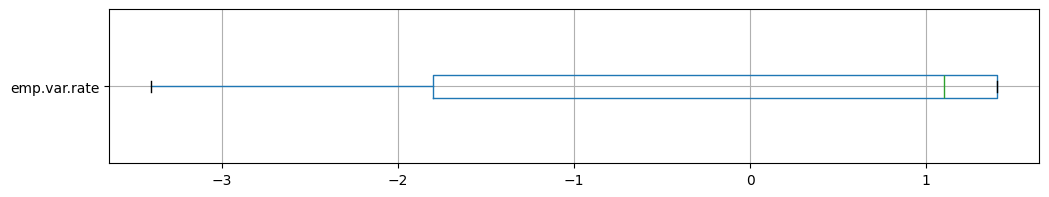

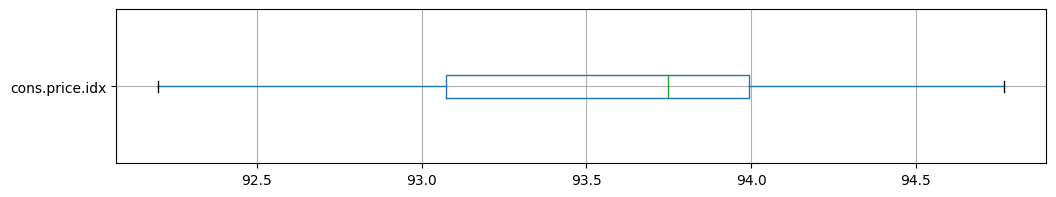

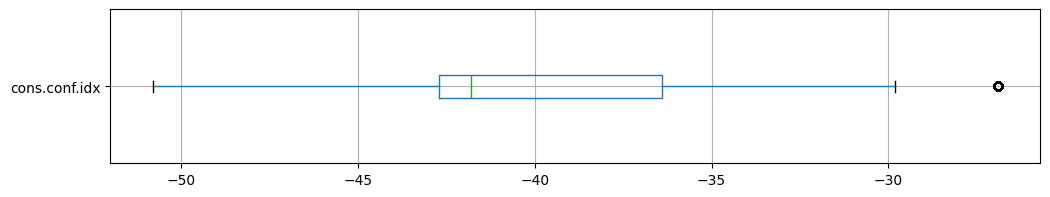

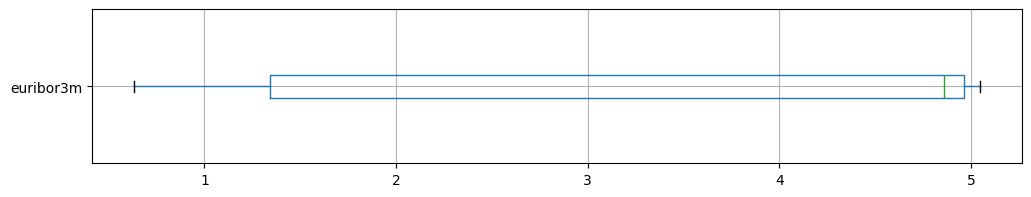

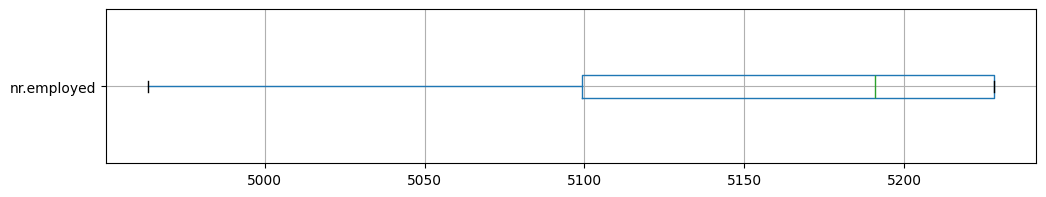

In [13]:
for label, values in bank_data_full.items():
    if values.dtype != object:
        bank_data_full.boxplot(column=[label], vert=False, figsize=(12, 2))
        plt.show()

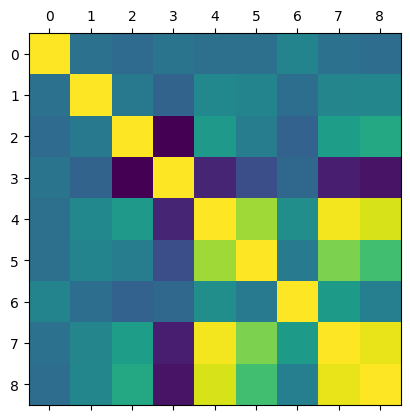

In [14]:
# Is there a correlation between features
# NOTE: this can only be done with numerical features
 
plt.matshow(bank_data_full.select_dtypes(exclude='object').corr())

<Axes: >

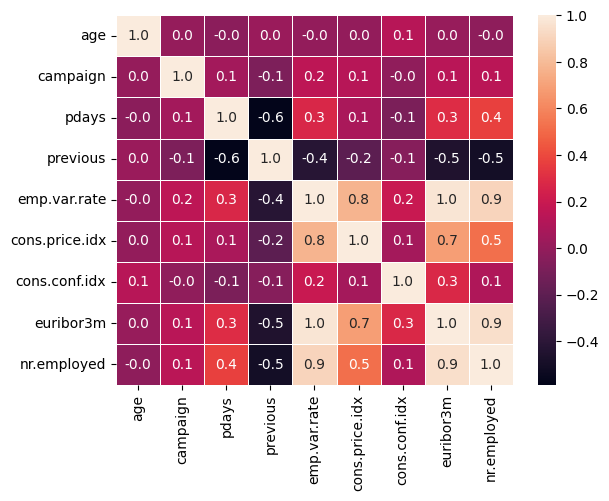

In [15]:
# What ss the correlation between features
# NOTE: this can only be done with numerical features
# NOTE 2: This means that this is not a way to determine a correlation with the target, because the target is yes/no

sns.heatmap(bank_data_full.select_dtypes(exclude='object').corr(), annot=True, linewidth=.5, fmt=".1f")

3 features hve a very high correlation (> 0.9): eurbor3m, emp.var.rate and nr.employed
Options are: 
- leave 2 out 
- combine the 3 to 1
- do nothing

### Make a binary from pdays

In [16]:

#Step 1: copy bank_data_fullto bank_data_full_p
bank_data_full_p = bank_data_full.copy()

#Step 2: add column based on Pdays
# Binary indicator
bank_data_full_p['contacted_before'] = (bank_data_full_p['pdays'] != 999).astype(int)

#step 3: remove column Pdays
bank_data_full_p = bank_data_full_p.drop(columns=['pdays'])

In [17]:
# split the dataframe i X and y
# in doing so, make yes=1 and no=0 (both as integer)
X = bank_data_full.drop("y", axis='columns')
y = bank_data_full["y"].replace(to_replace={'yes': '1', 'no': '0'}).astype(int)

In [18]:
X = bank_data_full_p

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   marital           41188 non-null  object 
 3   education         41188 non-null  object 
 4   default           41188 non-null  object 
 5   housing           41188 non-null  object 
 6   loan              41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day_of_week       41188 non-null  object 
 10  campaign          41188 non-null  int64  
 11  previous          41188 non-null  int64  
 12  poutcome          41188 non-null  object 
 13  emp.var.rate      41188 non-null  float64
 14  cons.price.idx    41188 non-null  float64
 15  cons.conf.idx     41188 non-null  float64
 16  euribor3m         41188 non-null  float6

In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


## Split data into Train en Test

In [20]:
# Split te dataframe training and testset, using stratify, because yes/no is imbalanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #checking the shape of the splits
print("Train: ", len(X_train), "&",len(y_train))
print("Test: ", len(X_test), "&",len(y_test))

(32950, 20) (8238, 20) (32950,) (8238,)
Train:  32950 & 32950
Test:  8238 & 8238


# Create the pipeline

## Preprocessing

In [21]:
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
num_pipeline = make_pipeline(StandardScaler())

cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "contacted_before"]
num_features = ["age", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
    ])

# Model Logistic Regression

## Logistic Regression pipeline

In [22]:
#LogisticRegression pipeline
log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))

## Train basic LR model

In [23]:
# Training without crossvalidation
log_reg.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Test basic LR model

In [24]:
# make a prediction on the test-set
y_test_pred = log_reg.predict(X_test)

In [25]:
# Recall
recall_log_reg = recall_score(y_test, y_test_pred)
print("Recall: ", recall_log_reg)

# Precision
precision_log_reg = precision_score(y_test, y_test_pred)
print("Precision: ", precision_log_reg)

Recall:  0.21875
Precision:  0.6835016835016835


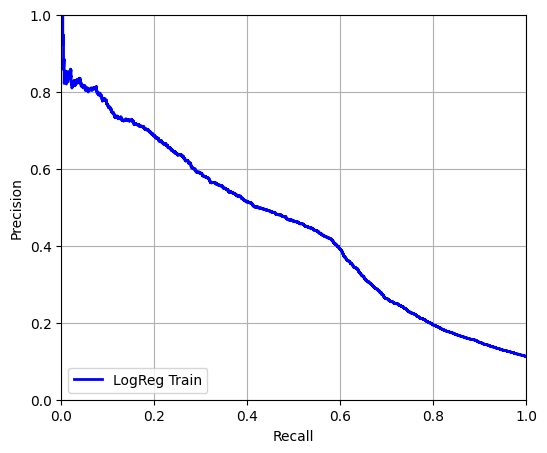

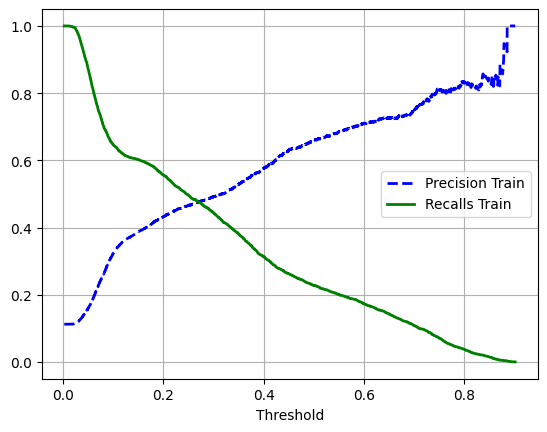

In [35]:
#Draw curves on TRAIN set
y_train_proba_lr = log_reg.predict_proba(X_train)

train_precisions_lr, train_recalls_lr, train_thresholds_lr = precision_recall_curve(y_train, y_train_proba_lr[:,1])

plt.figure(figsize=(6, 5))

# recall vs precision
plt.plot(train_recalls_lr, train_precisions_lr, "b-", linewidth=2, label="LogReg Train")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# recall and precision vs thresholds
plt.plot(train_thresholds_lr, train_precisions_lr[:-1], "b--", label="Precision Train", linewidth=2)
plt.plot(train_thresholds_lr, train_recalls_lr[:-1], "g-", label="Recalls Train", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

## Train LR Model With Cross Validation

In [27]:
#LogisticRegression cross validated predict probalities on TRAINING set
y_train_proba_lr_cv = cross_val_predict(log_reg, X_train, y_train, cv=10, method="predict_proba")


In [ ]:
# Recall cross validated
recall_log_reg_cv = recall_score(y_train, y_train_proba_lr_cv[:,1].round())
print(f"Recall: {recall_log_reg_cv:.3f}")

# Precision cross validated
precision_log_reg_cv = precision_score(y_train, y_train_proba_lr_cv[:,1].round())
print(f'Precision: {precision_log_reg_cv:.3f}')


Recall: 0.227
Precision: 0.654


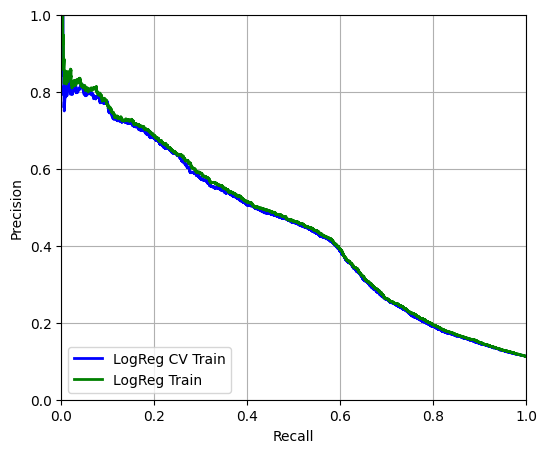

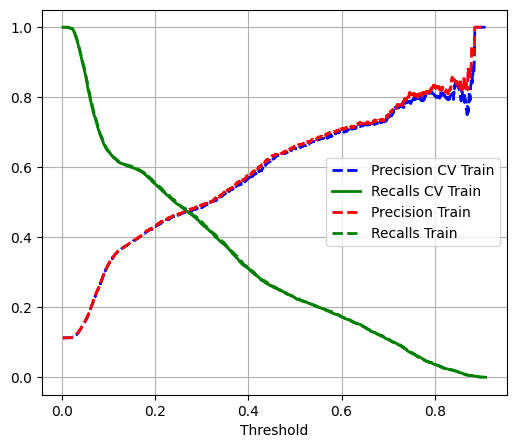

In [28]:
# Draw the Curve(s)
train_precisions_lr_cv, train_recalls_lr_cv, train_thresholds_lr_cv = precision_recall_curve(y_train, y_train_proba_lr_cv[:, 1])

# recall vs precision
plt.figure(figsize=(6, 5))
plt.plot(train_recalls_lr_cv, train_precisions_lr_cv, "b-", linewidth=2, label="LogReg CV Train")
plt.plot(train_recalls_lr, train_precisions_lr, "g-", linewidth=2, label="LogReg Train")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# recall and precision vs thresholds
plt.figure(figsize=(6, 5))
plt.plot(train_thresholds_lr_cv, train_precisions_lr_cv[:-1], "b--", label="Precision CV Train", linewidth=2)
plt.plot(train_thresholds_lr_cv, train_recalls_lr_cv[:-1], "g-", label="Recalls CV Train", linewidth=2)
plt.plot(train_thresholds_lr, train_precisions_lr[:-1], "r--", label="Precision Train", linewidth=2)
plt.plot(train_thresholds_lr, train_recalls_lr[:-1], "g--", label="Recalls Train", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

## Test LR model with CV

In [29]:
#LogisticRegression cross validated predict probalities on TEST set
y_test_proba_lr_cv = cross_val_predict(log_reg, X_test, y_test, cv=10, method="predict_proba")

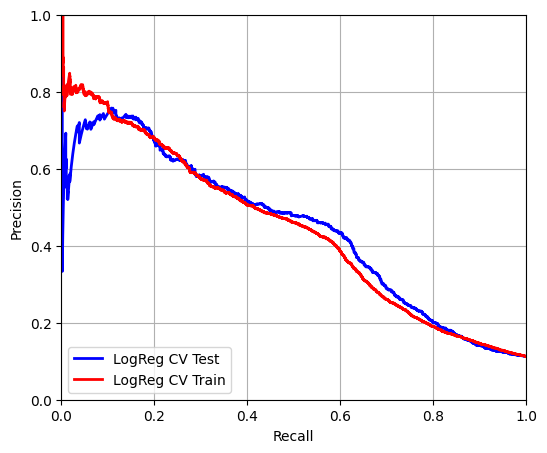

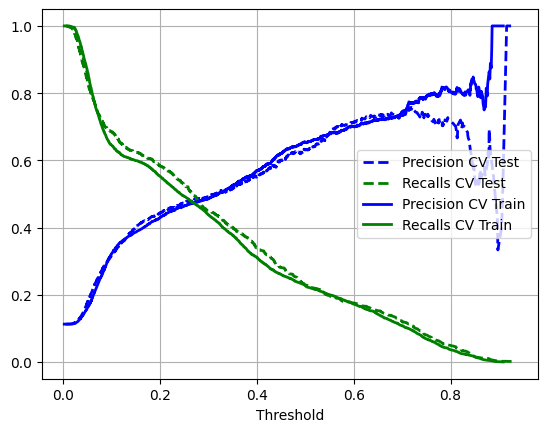

In [30]:
# Draw the Curve(s)
test_precisions_lr_cv, test_recalls_lr_cv, test_thresholds_lr_cv = precision_recall_curve(y_test, y_test_proba_lr_cv[:, 1])

plt.figure(figsize=(6, 5))

# recall vs precision / compare test to train
plt.plot(test_recalls_lr_cv, test_precisions_lr_cv, "b-", linewidth=2, label="LogReg CV Test")
plt.plot(train_recalls_lr_cv, train_precisions_lr_cv, "r-", linewidth=2, label="LogReg CV Train")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# recall and precision vs thresholds / compare test to train
plt.plot(test_thresholds_lr_cv, test_precisions_lr_cv[:-1], "b--", label="Precision CV Test", linewidth=2)
plt.plot(test_thresholds_lr_cv, test_recalls_lr_cv[:-1], "g--", label="Recalls CV Test", linewidth=2)
plt.plot(train_thresholds_lr_cv, train_precisions_lr_cv[:-1], "b-", label="Precision CV Train", linewidth=2)
plt.plot(train_thresholds_lr_cv, train_recalls_lr_cv[:-1], "g-", label="Recalls CV Train", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

## Hyperparamater tuning LR Model, using GridSearch

The hyperparameters for Logistic regression are:
- Penalty
- Solver
- max_iter
- l1_ratio (Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.)

In [ ]:
# Check the parameters of the baseline Logistic Regression model
log_reg.named_steps['logisticregression'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
param_grid = [    
    {'logisticregression__solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
     'logisticregression__penalty' : ['l2', None],
     'logisticregression__max_iter' : [100, 500, 1000]
    },
    {'logisticregression__solver' : ['liblinear'],
     'logisticregression__penalty' : ['l1', 'l2'],
     'logisticregression__max_iter' : [100, 500, 1000]
    },
    {'logisticregression__solver' : ['saga'],
     'logisticregression__penalty' : ['l1', 'l2', None],
     'logisticregression__max_iter' : [100, 500, 1000]
    },
    {'logisticregression__solver' : ['saga'],
     'logisticregression__penalty' : ['elasticnet'],
     'logisticregression__max_iter' : [100, 500, 1000],
     'logisticregression__l1_ratio' : [0.1, 0.5, 0.9]
    }
    ]

#Using 10 folds in crossvalidating
log_reg_grid_search = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1, error_score='raise')

log_reg_grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'logisticregression__max_iter': [100, 500, ...], 'logisticregression__penalty': ['l2', None], 'logisticregression__solver': ['lbfgs', 'newton-cg', ...]}, {'logisticregression__max_iter': [100, 500, ...], 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__solver': ['liblinear']}, ...]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


In [47]:
log_reg_grid_search.best_params_

{'logisticregression__l1_ratio': 0.5,
 'logisticregression__max_iter': 500,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

In [48]:
log_reg_grid_search.best_estimator_

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
#predict, using the best estimator
y_train_proba_lr_be = log_reg_grid_search.best_estimator_.predict_proba(X_train)


In [50]:
# Recall best estimator
recall_log_reg_be = recall_score(y_train, y_train_proba_lr_be[:,1].round())
print(f"Recall: {recall_log_reg_be:.3f}")

# Precision cross validated
precision_log_reg_be = precision_score(y_train, y_train_proba_lr_be[:,1].round())
print(f'Precision: {precision_log_reg_be:.3f}')


Recall: 0.230
Precision: 0.658


## Compare best LR model to CV LR model

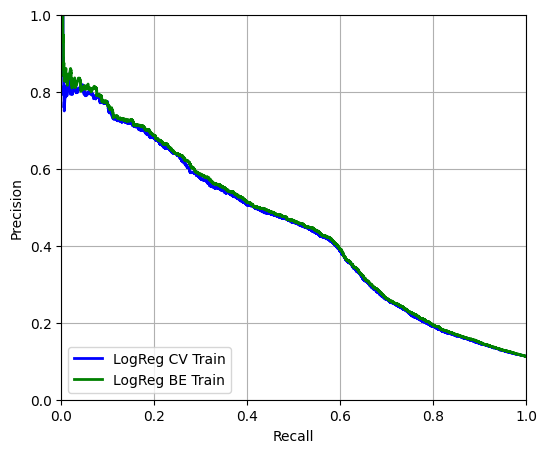

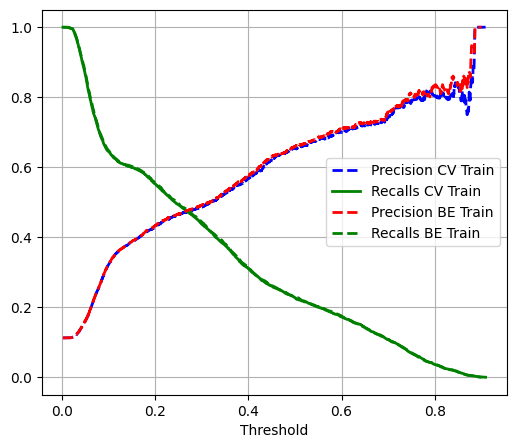

In [34]:
# Draw the Curve(s)
train_precisions_lr_be, train_recalls_lr_be, train_thresholds_lr_be = precision_recall_curve(y_train, y_train_proba_lr_be[:, 1])

# recall vs precision
plt.figure(figsize=(6, 5))
plt.plot(train_recalls_lr_cv, train_precisions_lr_cv, "b-", linewidth=2, label="LogReg CV Train")
plt.plot(train_recalls_lr_be, train_precisions_lr_be, "g-", linewidth=2, label="LogReg BE Train")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# recall and precision vs thresholds
plt.figure(figsize=(6, 5))
plt.plot(train_thresholds_lr_cv, train_precisions_lr_cv[:-1], "b--", label="Precision CV Train", linewidth=2)
plt.plot(train_thresholds_lr_cv, train_recalls_lr_cv[:-1], "g-", label="Recalls CV Train", linewidth=2)
plt.plot(train_thresholds_lr_be, train_precisions_lr_be[:-1], "r--", label="Precision BE Train", linewidth=2)
plt.plot(train_thresholds_lr_be, train_recalls_lr_be[:-1], "g--", label="Recalls BE Train", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

### looking at the curves, the conclusion is that the cross validation and the best estimator have the same results.

## ROC AUC LR Model
### Let's check, using ROC AUC

Comparing basic, CV and BE models

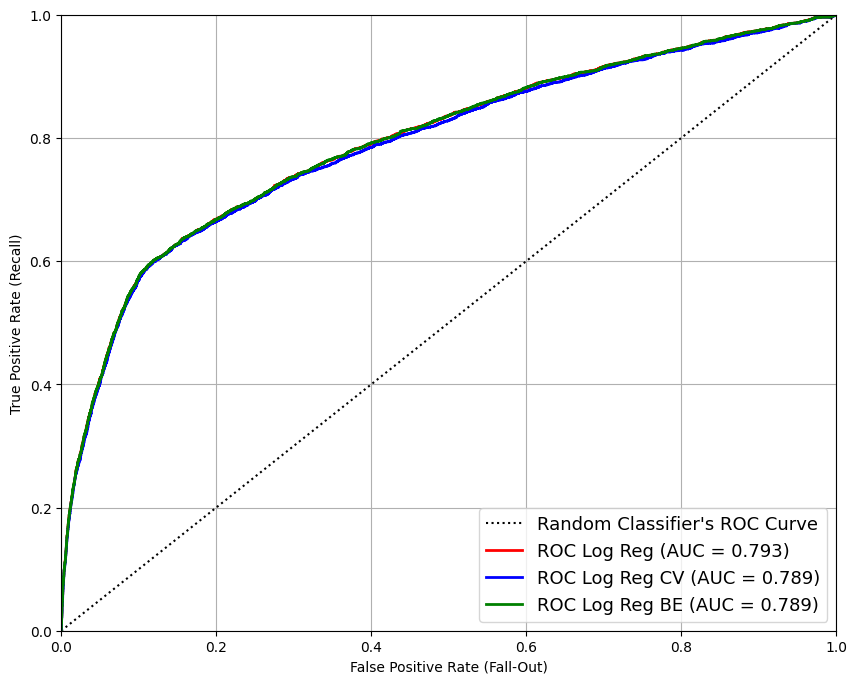

In [51]:
# TPR's & FPR's
fpr_lr, tpr_lr, _ = roc_curve(y_train, y_train_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, _ = roc_curve(y_train, y_train_proba_lr_cv[:,1])
fpr_lr_be, tpr_lr_be, _ = roc_curve(y_train, y_train_proba_lr_be[:,1])


#compute the AUC scores
auc_lr = roc_auc_score(y_train, y_train_proba_lr[:,1])
auc_lr_cv = roc_auc_score(y_train, y_train_proba_lr_cv[:,1])
auc_lr_be = roc_auc_score(y_train, y_train_proba_lr_cv[:,1])

# Start plotting
plt.figure(figsize=(10,8))

#plot the Random Classifier
plt.plot([0,1], [0,1], 'k:', label = "Random Classifier's ROC Curve")

#plot the ROC's of the models & the AUC's
plt.plot(fpr_lr, tpr_lr, "r-", linewidth=2, label=f"ROC Log Reg (AUC = {auc_lr:.3f})")
plt.plot(fpr_lr_cv, tpr_lr_cv, "b-", linewidth=2, label=f"ROC Log Reg CV (AUC = {auc_lr_cv:.3f})")
plt.plot(fpr_lr_be, tpr_lr_be, "g-", linewidth=2, label=f"ROC Log Reg BE (AUC = {auc_lr_be:.3f})")

#some formatting
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

# Costbased Thresholding - an attempt

In [53]:
def binary_clf_curve(y_true, y_score):
    
    #make Numpy arrays from pd.Series
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy()

    if isinstance(y_score, pd.Series):
        y_score = y_score.to_numpy()
    
    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    
    # y_score typically has many tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve.
    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    tps = np.cumsum(y_true)[threshold_idxs]
    
    fps = 1 + threshold_idxs - tps
    fns = tps[-1] - tps
    thresholds = y_score[threshold_idxs]
    return tps, fps, fns, thresholds

In [55]:
# Function to illustrates the process of Empirical Cost-Based Thresholding
def empirical_costbased_thresholding(y_true, scores, model_name, C_FP, C_FN, p=False):
    """
    Illustrates Empirical Cost-Based Thresholding

    Parameters
    ----------
    scores : ndarray of shape (n_samples,)
        Predicted scores for all samples (e.g. classifier outputs or probabilities).
    model_name : str
        Name of the model, used for labeling or output purposes.
    C_FP : int or float
        Cost associated with a false positive classification.
    C_FN : int or float
        Cost associated with a false negative classification.
    p : bool, optional (default=False)
        If True, the scores are probability-like and range from 0 to 1.
        and will be compared with the theoretical 
    """
    
    
    true_positives, false_positives,  false_negatives, thresholds = binary_clf_curve(y_true, scores)
    
    total_costs = C_FP * false_positives + C_FN * false_negatives  
    
    plt.figure()
    
    plt.plot(thresholds, total_costs, marker='o',color='blue' , linestyle='-')
    plt.plot(thresholds, total_costs,  linestyle='-',color='blue', linewidth=4, label= 'Total Expected Cost')
    
    
    if(p):
        plt.xlabel("Probability Threshold")
    else:
        plt.xlabel("Threshold")
    plt.ylabel("Cost")
    plt.title(f"Cost vs. Threshold - {model_name}")
    
    min_cost_index = np.argmin(total_costs)
    optimal_threshold = thresholds[min_cost_index]
    
    plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.legend()
    plt.show()
    
    TP = true_positives[min_cost_index]
    FP = false_positives[min_cost_index]
    FN = false_negatives[min_cost_index]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
                    
    
    threshold_with_calibrated_p = C_FP/(C_FN+C_FP)
    print(f"Optimal threshold for {model_name}: {optimal_threshold:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Empirically minimized expected costs: {total_costs[min_cost_index]:.2f}")
    print(f"Empirically minimized expected costs per item: {total_costs[min_cost_index]/len(y_true):.2f}")
    
    if(p):
        print(" ")
        print(f"With calibrated p threshold would be: {threshold_with_calibrated_p:.2f}")
        index = np.searchsorted(-thresholds, -threshold_with_calibrated_p, side='right') - 1
        print(f"Expected cost with this calibrated p threshold: {total_costs[index]:.2f}")    
    
    return optimal_threshold

## Kosten FP en FN

In [64]:
vaste_kosten_gesprek = 15
kosten_minuut = 3
aantal_minuten = 8
gemiste_omzet = 100

# False Positive is een onnodig gevoerd gesprek
kosten_onnodig_gesprek = vaste_kosten_gesprek + (aantal_minuten * kosten_minuut)

# False Negative is een niet gevoerd, maar wel gewenst gesprek
kosten_gemist_gesprek = gemiste_omzet
print (f"Kosten onnodig gesprek (FP): {kosten_onnodig_gesprek}")
print (f"Kosten gemist gesprek (FN): {kosten_gemist_gesprek}")

Kosten onnodig gesprek (FP): 39
Kosten gemist gesprek (FN): 100


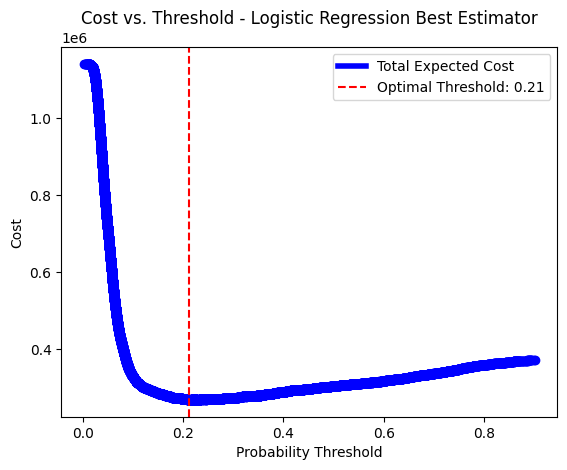

Optimal threshold for Logistic Regression Best Estimator: 0.21
Precision: 0.45
Recall: 0.54
Empirically minimized expected costs: 267500.00
Empirically minimized expected costs per item: 8.12
 
With calibrated p threshold would be: 0.28
Expected cost with this calibrated p threshold: 271435.00


In [65]:
th_lr = empirical_costbased_thresholding(y_train, y_train_proba_lr_be[:,1], "Logistic Regression Best Estimator", kosten_onnodig_gesprek, kosten_gemist_gesprek, p=True)

KNN
DT
RF 
LogReg
